In [19]:
import random
import numpy as np
import os

In [20]:
data_path = "../data/Persian_Plates_Digits_YOLOV8"
train_path = os.path.join(data_path, "train")

In [21]:
size = (200,70)

In [22]:
from src.Dataset import CustomDatasetDigit as DigitDataset

train_dataset = DigitDataset(train_path,size=size)
len(train_dataset)

184

In [23]:
classes_dict =  {
    '0':'0',
    '1':'1',
    '2':'2',
    '3':'3',
    '4':'4',
    '5':'5',
    '6':'6',
    '7':'7',
    '8':'8',
    '9':'9',
    '10':'B',
    '11':'C',
    '12':'D',
    '13':'G',
    '14':'H',
    '15':'J',
    '16':'L',
    '17':'M',
    '18':'N',
    '19':'S',
    '20':'T',
    '21':'V',
    '22':'Y'
}

In [24]:
def draw_box(img, bboxes) :
    for b1 in bboxes :
        # Decode the label index by classes_dict
        label = classes_dict[b1[0]]

        # Unnormalize centers
        x_center = float(b1[1]) * size[0]
        y_center = float(b1[2]) * size[1]
        w = float(b1[3]) * size[0]
        h = float(b1[4]) * size[1]

        # Determine 2 point of each box (top-left, bottom-right)
        x_min = round(x_center - (w / 2))
        x_max = round(x_center + (w / 2))
        y_min = round(y_center - (h / 2))
        y_max = round(y_center + (h / 2))

        # A small box above earlier boxes to write value in it
        x1 = round(x_center - w/4)
        x2 = round(x_center + w/4)
        y1 = round(3)
        y2 = round(10)

        # Draw boxes and write the values in them
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 1, cv2.LINE_AA)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), -1, cv2.LINE_AA)
        cv2.putText(img, label, (x1, y1+9), cv2.FONT_HERSHEY_COMPLEX, 0.35, (0, 255, 255), 1, cv2.LINE_AA)

In [25]:
# Select K random images
import cv2
import matplotlib.pyplot as plt

vizu_dataset = DigitDataset(train_path, size=size)
img, bboxes = vizu_dataset[np.random.randint(len(train_dataset))]
type(img), type(bboxes)

(numpy.ndarray, list)

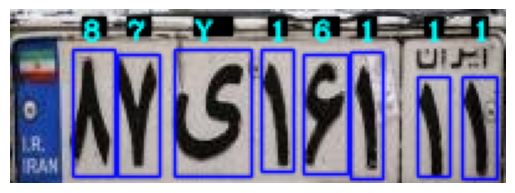

In [27]:
draw_box(img, bboxes)
plt.imshow(img)
plt.axis('off')
plt.show()


In [42]:
from ultralytics import YOLO

location_model = YOLO("../models/best_digit.pt")

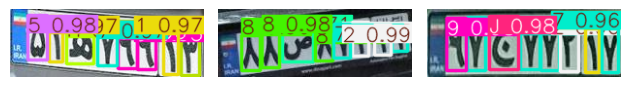

In [56]:


test_img = random.choices(vizu_dataset, k=3)
fig, axs = plt.subplots(1, len(test_img))
for ax, (x, y) in zip(axs, test_img):
    pred = location_model.predict([x], save=False, conf=0.5, iou=0.7, verbose=False,show_conf=False)
    img = pred[0].plot()
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show();

In [58]:
type(pred)

list

In [57]:


list_of_items = []
for i in range(len(pred[0])) :
    class_label = classes_dict[str(int(pred[0][i].boxes.cls))]
    cord_x = int(pred[0][i].boxes.xyxy[0][0])
    list_of_items.append((cord_x, class_label))

list_of_items.sort()
list_of_items

[(20, '9'),
 (41, '7'),
 (64, 'J'),
 (96, '7'),
 (117, '7'),
 (137, '2'),
 (163, '1'),
 (180, '7')]